# Лабораторна робота 2А. Одношаровий персептрон.
Виконав студент групи ФІ-21, Голуб Михайло

Варіант -- 3

In [155]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/data03.csv", sep=";", header=None)
df.columns = ["x1", "x2", "y"]


df_train, df_test = train_test_split(df, test_size=0.3, random_state=1023)
X_train = df_train[["x1", "x2"]]
Y_train = df_train["y"]
X_test = df_test[["x1", "x2"]]
Y_test = df_test["y"]

X_train.head()

,x1,x2
57,0.186,0.982
61,0.537,0.795
92,0.330,0.454
38,0.708,0.697
10,0.871,0.072


Text(0.5, 1.0, 'Навчальні дані')

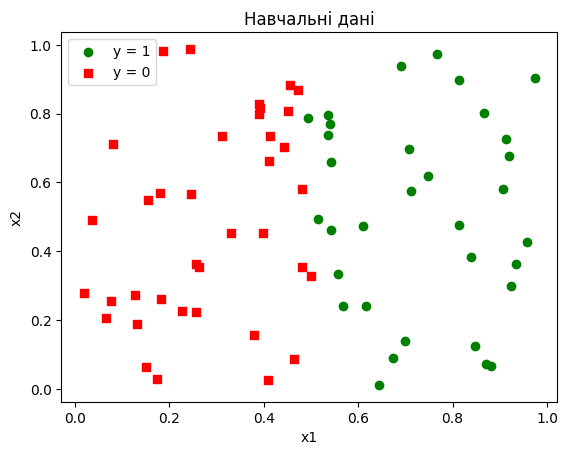

In [169]:
plt.scatter(df_train[df_train["y"] == 1]["x1"], df_train[df_train["y"] == 1]["x2"], c = "g", marker = "o", label = "y = 1")
plt.scatter(df_train[df_train["y"] == 0]["x1"], df_train[df_train["y"] == 0]["x2"], c = "r", marker = "s", label = "y = 0")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Навчальні дані")

### Реалізація одношарового персептрону

In [160]:
class SingleLayerPerceptron:
    def __init__(self, input_dim=2):
        self.w = np.zeros(input_dim)
        self.tau = 0.0

    def predict(self, x):
        x = np.array(x, dtype=float)
        return (x @ self.w - self.tau) > 0

    def train_single(self, x, y, train_step=0.1):
        y_pred = self.predict(x)
        error = y - int(y_pred)
        if error != 0:
            self.w += train_step * error * np.array(x, dtype=float)
            self.tau -= train_step * error
        return error == 0

    def train_epoch(self, X, Y, train_step=0.1):
        correct = 0
        for x, y in zip(X, Y):
            if self.train_single(x, y, train_step):
                correct += 1
        return correct / len(X)

    def predict_accuracy(self, X, Y):
        X = np.array(X, dtype=float)
        Y_pred = self.predict(X).astype(int)
        return np.mean(Y_pred == Y)
    
    def train_with_decay(self, X, Y, epochs=50, initial_step=0.1, decay=0.95):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=int)
        lr = initial_step
        history = []
        for epoch in range(epochs):
            acc = self.train_epoch(X, Y, train_step=lr)
            history.append((epoch + 1, lr, acc))
            lr *= decay  # diminish learning rate
        return history


### Навчання персептрону

Test accuracy: 1.0


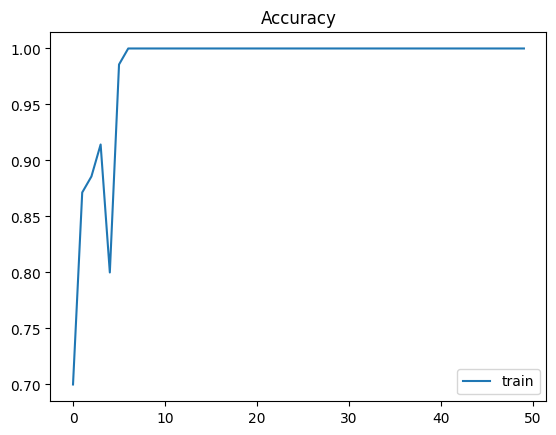

In [163]:
SLP = SingleLayerPerceptron()
acc = SLP.train_with_decay(X_train, Y_train)
plt.plot([a[2] for a in acc], label = "train")
plt.legend()
plt.title("Accuracy")
print("Test accuracy:", SLP.predict_accuracy(X_test, Y_test))

### Результат навчання

Text(0.5, 1.0, 'Розмежовуюча лінія персептрона та тестові дані')

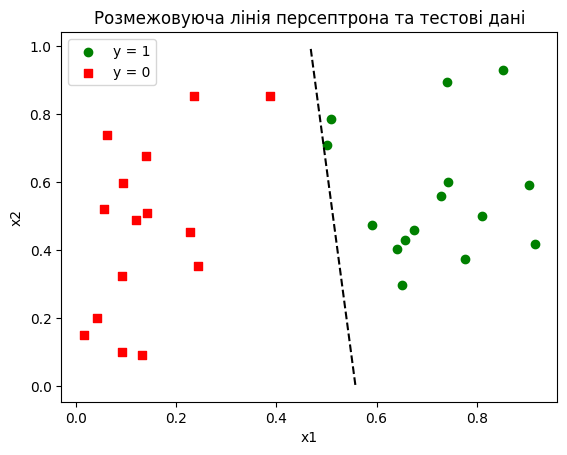

In [167]:
plt.scatter(df_test[df_test["y"] == 1]["x1"], df_test[df_test["y"] == 1]["x2"], c = "g", marker = "o", label = "y = 1")
plt.scatter(df_test[df_test["y"] == 0]["x1"], df_test[df_test["y"] == 0]["x2"], c = "r", marker = "s", label = "y = 0")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
x1 = np.linspace(0, 1, 1000)
x2 = (SLP.tau - SLP.w[0] * x1) / SLP.w[1]
mask = (x2 >= 0) & (x2 <= 1)
x1_clipped = x1[mask]
x2_clipped = x2[mask]
plt.plot(x1_clipped, x2_clipped, 'k--', label='Decision boundary')
plt.title("Розмежовуюча лінія персептрона та тестові дані")